In [4]:
import pandas as pd

In [6]:
dataset = pd.read_csv("/data.csv")

In [7]:
dataset.shape

(169909, 19)

In [8]:
dataset.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

In [9]:
dataset

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


In [10]:
import matplotlib.pyplot as plt

In [11]:
dataset.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

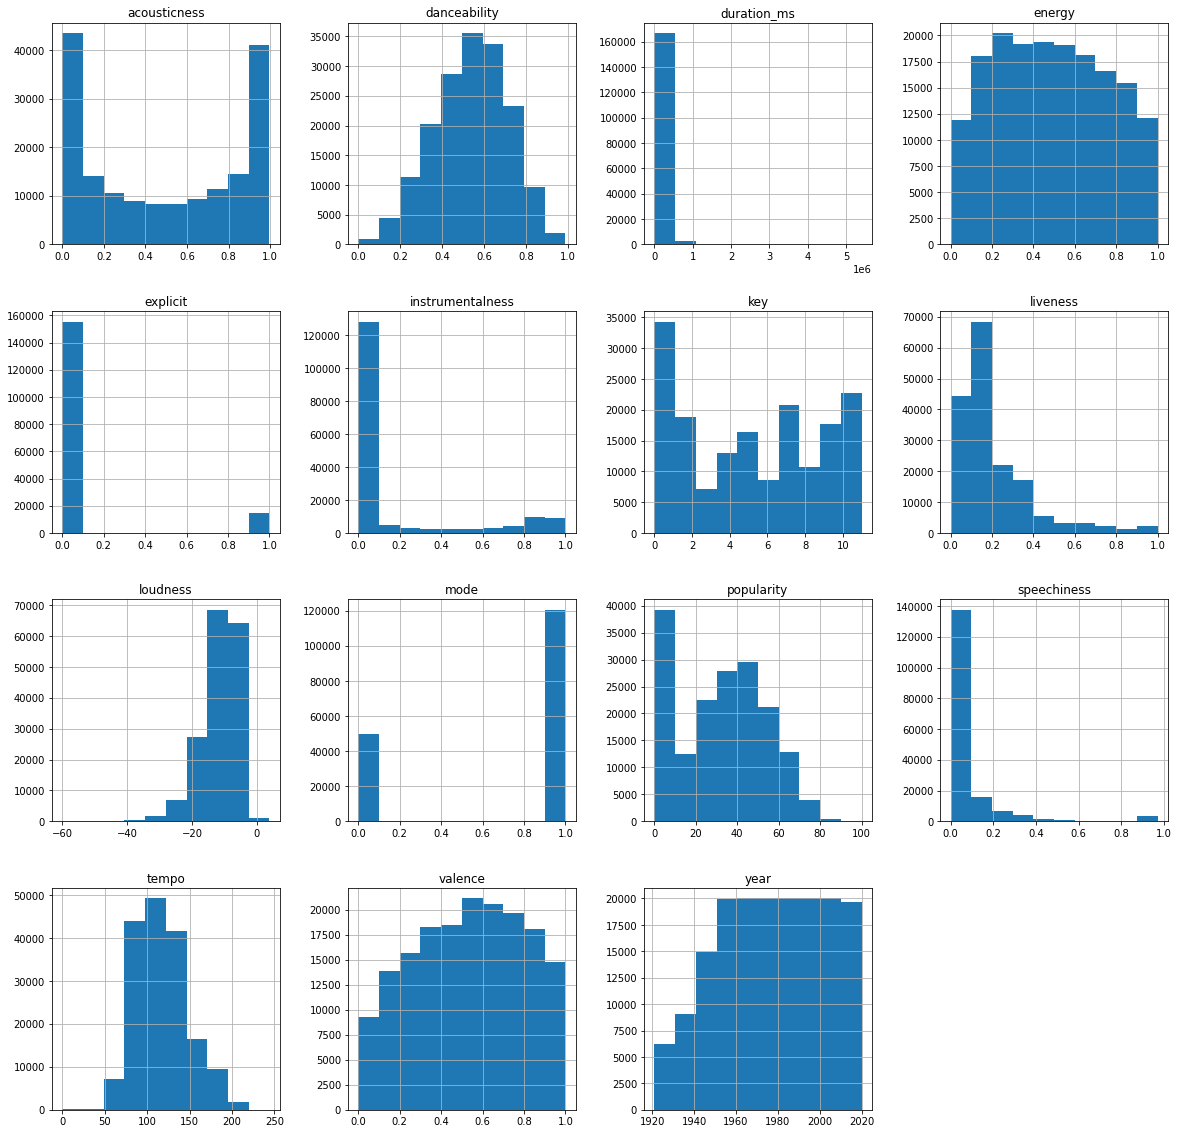

In [12]:
dataset.hist(figsize=(20, 20))
plt.show()

In [13]:
import seaborn as sns

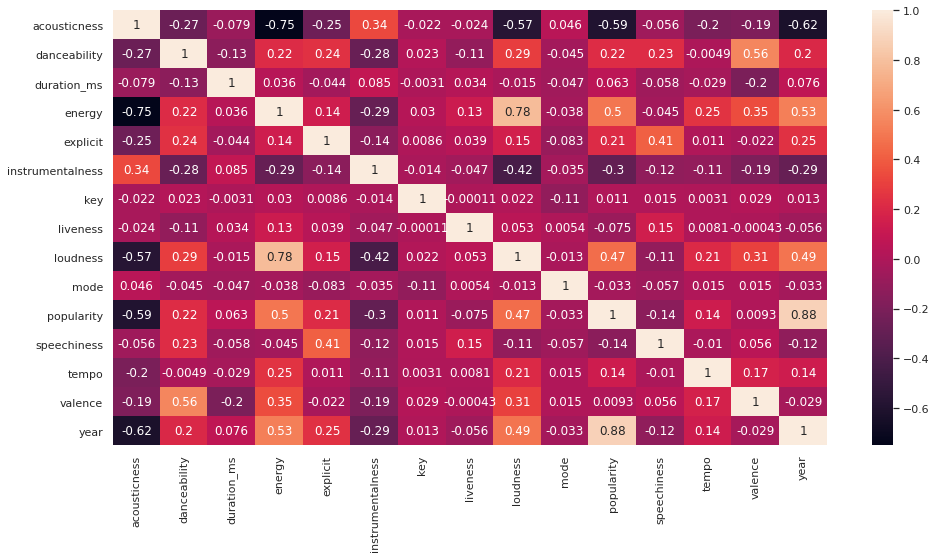

In [14]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = dataset.corr()
sns.heatmap(corr,annot=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


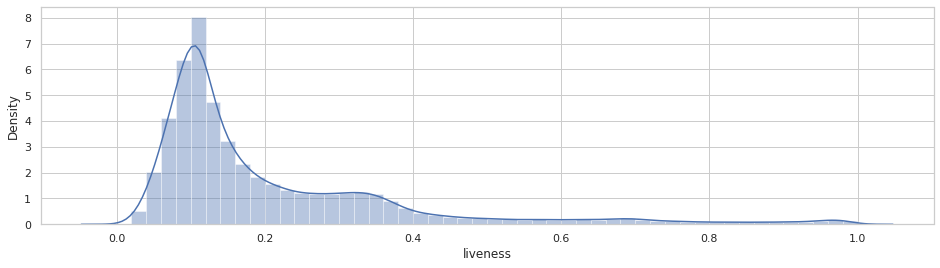

In [15]:
plt.figure(figsize=(16, 4))
sns.distplot(dataset["liveness"])

<Figure size 1152x576 with 0 Axes>

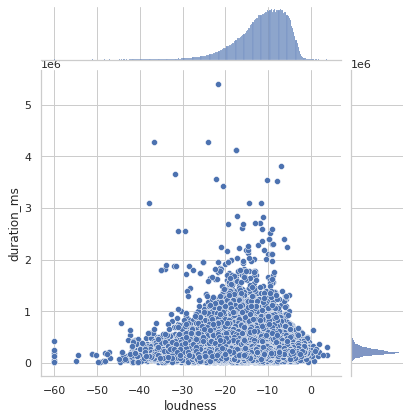

In [16]:
plt.figure(figsize=(16, 8))
ax = sns.jointplot(x=dataset['loudness'],y=dataset["duration_ms"],data=dataset)

In [22]:
!pip install lyricsgenius

     |████████████████████████████████| 51kB 1.6MB/s 


In [102]:
import lyricsgenius
genius = lyricsgenius.Genius('a0pGPKAxxuBom9BZEM6YQ4wrGaKAlnPYoWPTTXFe0t4wtJgHzx_1xGorgDcYL-9e')

In [104]:
artist = genius.search_artist("Robert Schumann", max_songs=3, sort=, include_features=True)
print(artist.songs)

Searching for songs by Francisco Canaro...

Song 1: "Aunque No Lo Crean"
Song 2: "El adiós"
Song 3: "El Chino Pantaleón"

Reached user-specified song limit (3).
Done. Found 3 songs.
[('Aunque No Lo Crean', 'Francisco Canaro'), ('El adiós', 'Francisco Canaro'), ('El Chino Pantaleón', 'Francisco Canaro')]


In [106]:
song = artist.song("Aunque No Lo Crean")
print(song.lyrics)

Dicen que yo no tengo amor
Y que abusé de tu querer
Dicen que dicen, que no se puede creer
Que yo te quiera, como te quiero yo
Dicen que yo te soy infiel
Para humillar a tu pasión
Dicen que busco matar ese querer
Dicen que tengo como piedra el corazón
Aunque no lo crean, yo te quiero tanto
Que sin ti la vida es pena y quebranto
Y te llevo dentro, dentro de mi alma
Dentro de mis venas, dentro de mis carnes
Aunque no lo crean, te amo con delirio
Porque sos mi aliento y sin ti me muero
Y dejá que digan esos que de rabia
Sueltan un veneno formando palabras
Y han de saber que yo nací
Para sufrir y para amar
Y que paso las noches sin dormir
Por esos ojos que invitan a soñar
Y han de saber que por tu amor
Sacrifiqué vida y placer
Y al pensar que te pudiera perder
Palpita fuerte mi abatido corazón
Aunque no lo crean sos mi gran amor


In [26]:
song = artist.song("To You")
# or:
# song = genius.search_song("To You", artist.name)
print(song.lyrics)

Searching for "To You" by Andy Shauf...
Done.
Jeremy can we talk a minute?
I've got some things that I need to
Get off of my chest

I know that we have had a few
And it's far too late
But if I wait I might never tell you

Can we find somewhere quiet?
Let's go outside
I've got some smokes if you've got a light

It's just that sometimes when I'm by your side
It feels so right
It feels like nothing could go wrong

Does it ever
Feel like that to you?
Does it ever
Feel like that to you?

Oh I don't know what I mean
It sounded wrong and I'm just tired
Not being weird

I just mean that you're a good friend
It's hard to explain
Just forget I said anything

Get over yourself
I'm not in love with you
It just came out all wrong

Yeah
Tell the guys and laugh it up
Why am I even surprised?

That it never
Feels like that to you
That it never
Feels like that to you
I guess it never
Feels like that to you
I guess it never
Feels like that to you


In [139]:
df = dataset.head(200)

In [140]:
Lyrics = []
count = 0
for i, row in df.iterrows():
  song = genius.search_song(row['name'])
  if song is not None:
    Lyrics.append(song.lyrics.replace('\n', ' ')) 
    count = count + 1
  else:
    Lyrics.append('')

Searching for "Singende Bataillone 1. Teil"...
Done.
Searching for "Fantasiestücke, Op. 111: Più tosto lento"...
No results found for: 'Fantasiestücke, Op. 111: Più tosto lento'
Searching for "Chapter 1.18 - Zamek kaniowski"...
No results found for: 'Chapter 1.18 - Zamek kaniowski'
Searching for "Bebamos Juntos - Instrumental (Remasterizado)"...
No results found for: 'Bebamos Juntos - Instrumental (Remasterizado)'
Searching for "Polonaise-Fantaisie in A-Flat Major, Op. 61"...
Done.
Searching for "Scherzo a capriccio: Presto"...
Done.
Searching for "Valse oubliée No. 1 in F-Sharp Major, S. 215/1"...
No results found for: 'Valse oubliée No. 1 in F-Sharp Major, S. 215/1'
Searching for "Per aspera ad astra"...
Done.
Searching for "Moneda Corriente - Remasterizado"...
No results found for: 'Moneda Corriente - Remasterizado'
Searching for "Chapter 1.3 - Zamek kaniowski"...
No results found for: 'Chapter 1.3 - Zamek kaniowski'
Searching for "Piano Sonata No. 2 in B-Flat Minor, Op. 36: I. Alle

In [141]:
df['Lyrics'] = Lyrics

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [142]:
df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,Lyrics
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928,"God said to Nietzsche: That’ll Tietzsche, You ..."
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928,
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928,
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928,
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928,Instrumental
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.988,['Roza Eskenazi'],0.475,201173,0.4450,0,4KZAdHeZ2uqhrzFIQW9IE2,0.019100,6,0.3660,-11.115,1,To Marikaki,0,1930-01-01,0.0420,80.644,0.7960,1930,Masz to co ja chcę Mam to co Ty chcesz Masz to...
196,0.981,"['Federico Moreno Torroba', 'Vicente Gomez', '...",0.533,159896,0.2050,0,4KgutHaYymtSF07o1ezYkf,0.943000,3,0.1070,-18.888,0,Fandanguillo,0,1930-01-01,0.0676,114.557,0.7120,1930,Instrumental
197,0.984,"['Francisco Canaro', 'Charlo']",0.852,181987,0.3750,0,4KnjJgdiSy5k7aapXGJyov,0.100000,2,0.2460,-6.287,1,El Pingo de Pascual - Remasterizado,0,1930-12-05,0.1350,117.141,0.8910,1930,
198,0.989,"['Francisco Canaro', 'Charlo']",0.439,192000,0.0716,0,4KuFgXbahxEILwg8qu1kKG,0.000014,7,0.1220,-19.899,1,Que Bello Es Soñar - Remasterizado,0,1930-11-12,0.0753,77.081,0.2300,1930,


In [143]:
count

90